In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cd D:\Downloads

D:\Downloads


In [3]:
data = pd.read_excel('Data_Train.xlsx')

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 500.8+ KB


In [7]:
data.isnull().sum() #check for null values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
data.dropna(inplace = True) #drop the nan values

In [9]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [ ]:
#convert the 'Date_of_journey' and other object data types to date time object 

In [10]:
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])
data['Dep_Time']=pd.to_datetime(data['Dep_Time'])
data['Arrival_Time']=pd.to_datetime(data['Arrival_Time'])
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [11]:
data['Journey_day']=data['Date_of_Journey'].dt.day #adding new columns
data['Journey_month']=data['Date_of_Journey'].dt.month

In [12]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-04-08 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-04-08 05:50:00,2021-04-08 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-04-08 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-04-08 18:05:00,2021-04-08 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-04-08 16:50:00,2021-04-08 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [13]:
## Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
data.drop('Date_of_Journey', axis=1, inplace=True)

***extract hours and minutes***

In [14]:
def extract_hour(df,col):
    df[col+"_hour"]=df[col].dt.hour

In [15]:
def extract_min(df,col):
    df[col+"_minute"]=df[col].dt.minute

In [16]:
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [17]:
#extracting hours
extract_hour(data,'Dep_Time')

In [18]:
# Extracting Minutes
extract_min(data,'Dep_Time')

In [19]:
data.drop('Dep_Time', axis = 1, inplace = True)

In [20]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-04-08 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-04-08 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-04-08 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50


In [21]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
extract_hour(data,'Arrival_Time')

# Extracting minutes
extract_min(data,'Arrival_Time')

# Now we can drop Arrival_Time as it is of no use
drop_column(data,'Arrival_Time')

In [22]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


***Preprossesing on "Duration" column***

In [23]:
duration=list(data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:                   # Check if duration contains only hour
            duration[i]=duration[i] + ' 0m'      # Adds 0 minute
        else:
            duration[i]='0h '+ duration[i]
        

In [24]:
data['Duration']=duration
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


***spliting duration column on " " and extracting hours and minutes***

In [25]:
def hour(x):
    return x.split(' ')[0][0:-1]
def min(x):
    return x.split(' ')[1][0:-1]

In [26]:
data['Duration_hours']=data['Duration'].apply(hour)
data['Duration_mins']=data['Duration'].apply(min)

In [27]:
data.drop('Duration',axis=1,inplace=True)

In [ ]:
# data.drop('Arrival_Time',axis=1,inplace=True)

In [29]:
data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_mins          object
dtype: object

In [30]:
data['Duration_hours']=data['Duration_hours'].astype(int)
data['Duration_mins']=data['Duration_mins'].astype(int)

In [31]:
data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int32
Duration_mins           int32
dtype: object

In [32]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


***now seperate categorical columns to perform one hot or label encoding***

In [33]:
cat_col=[col for col in data.columns if data[col].dtype=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

***seperate continous data***

In [34]:
cont_col=[col for col in data.columns if data[col].dtype!='O']
cont_col

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

***HANDLING CATEGORICAL DATA***

In [35]:
categorical=data[cat_col]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [36]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

***AIRLINE VS PRICE***

<AxesSubplot:xlabel='Airline', ylabel='Price'>

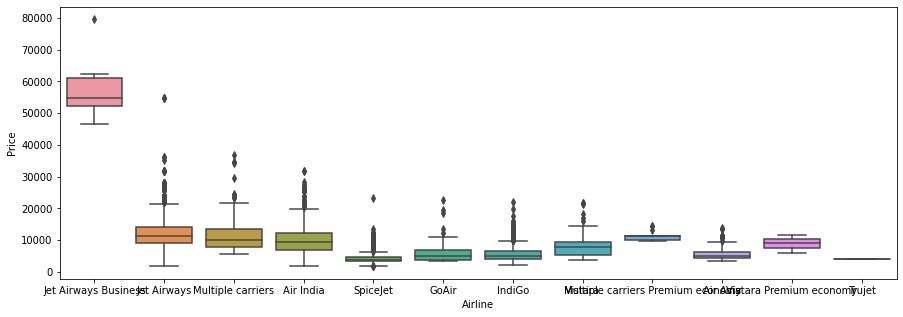

In [37]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=data.sort_values('Price',ascending=False))

***CONCLUSION***
    
    *APART FROM JET AIRWAYS, ALL THE OTHER AIRWAYS PRICE'S MEDIAN ARE ALMOST SIMILAR
    *JET AIRWAYS PRICE IS HAVING THE HIGHEST PRICE

***TOTAL NO OF STOPS VS PRICE***

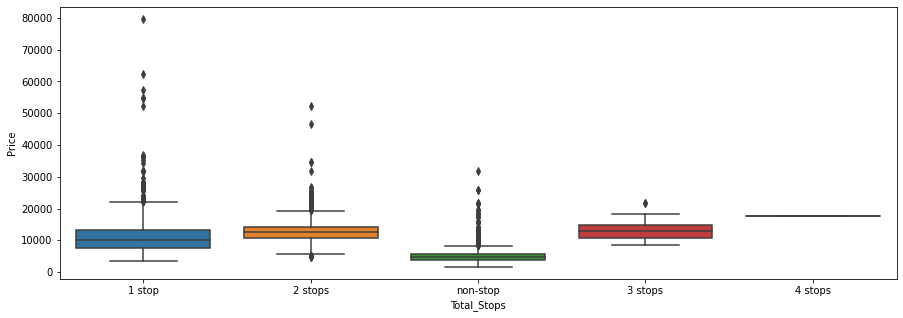

In [38]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Total_Stops',data=data.sort_values('Price',ascending=False))
plt.show()

***As Airline is Nominal Categorical data we will perform OneHotEncoding***


In [39]:
Airline=pd.get_dummies(categorical['Airline'], drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [40]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<Figure size 1080x360 with 0 Axes>

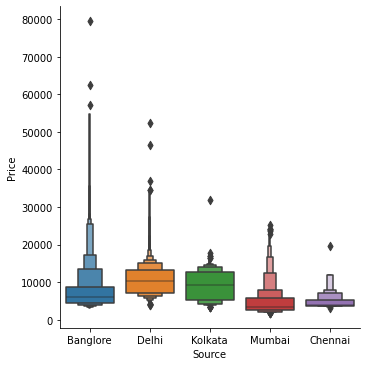

In [41]:
# Source vs Price

plt.figure(figsize=(15,5))
sns.catplot(y='Price',x='Source',data=data.sort_values('Price',ascending=False),kind='boxen')

***As Source is Nominal Categorical data we will perform OneHotEncoding***

In [42]:
Source=pd.get_dummies(categorical['Source'], drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [45]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

***As Destination is Nominal Categorical data we will perform OneHotEncoding***


In [46]:
Destination=pd.get_dummies(categorical['Destination'], drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [47]:
categorical['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [48]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [49]:
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

***CALCULATING HOW MANY STOPS***

In [50]:
categorical['Route_1']=categorical['Route'].str.split('→').str[0]
categorical['Route_2']=categorical['Route'].str.split('→').str[1]
categorical['Route_3']=categorical['Route'].str.split('→').str[2]
categorical['Route_4']=categorical['Route'].str.split('→').str[3]
categorical['Route_5']=categorical['Route'].str.split('→').str[4]

In [51]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [52]:
categorical['Route_1'].fillna('None',inplace=True) #filling the nan values with none
categorical['Route_2'].fillna('None',inplace=True)
categorical['Route_3'].fillna('None',inplace=True)
categorical['Route_4'].fillna('None',inplace=True)
categorical['Route_5'].fillna('None',inplace=True)

***now extract how many categories in each cat_feature***

In [53]:
for feature in categorical.columns:
    print('{} has total {} categories \n'.format(feature,len(categorical[feature].value_counts())))

Airline has total 12 categories 

Source has total 5 categories 

Destination has total 6 categories 

Route has total 128 categories 

Total_Stops has total 5 categories 

Additional_Info has total 10 categories 

Route_1 has total 5 categories 

Route_2 has total 45 categories 

Route_3 has total 30 categories 

Route_4 has total 14 categories 

Route_5 has total 6 categories 



***AS THERE ARE LOTS OF FEATURES IN ROUTE COLUMN WE CANT PERFORM ONE HOT ENCODING, SO WE WILL GO WITH LABEL ENCODING**

In [54]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [55]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4','Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [56]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,0,34,8,13,5


In [57]:
# Additional_Info contains almost 80% no_info,so we can drop this column
# we can drop Route as well as we have pre-process that column
    
drop_column(categorical,'Route')
drop_column(categorical,'Additional_Info')

In [58]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5


In [59]:
categorical['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [60]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [61]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding key

dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [62]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [63]:
data[cont_col]

,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,3897,24,3,22,20,1,10,2,50
1,7662,5,1,5,50,13,15,7,25
2,13882,6,9,9,25,4,25,19,0
3,6218,5,12,18,5,23,30,5,25
4,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...
10678,4107,4,9,19,55,22,25,2,30
10679,4145,27,4,20,45,23,20,2,35
10680,7229,27,4,8,20,11,20,3,0
10681,12648,3,1,11,30,14,10,2,40


In [64]:
# Concatenate dataframe --> categorical + Airline + Source + Destination

data=pd.concat([categorical,Airline,Source,Destination,data[cont_col]],axis=1)
data.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [66]:
drop_column(data,'Airline')
drop_column(data,'Source')
drop_column(data,'Destination')

In [67]:
data.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


### OUTLIER DETECTION

In [73]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    plt.figure(figsize=(15,8))

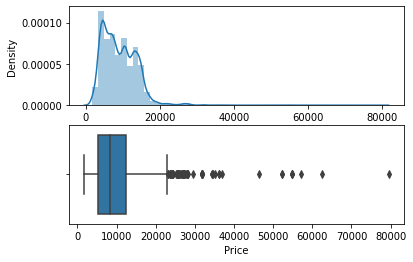

<Figure size 1080x576 with 0 Axes>

In [74]:
plot(data,'Price')

***Dealing with outliers***

In [75]:
data['Price']=np.where(data['Price']>=40000,data['Price'].median(),data['Price'])

<Figure size 2160x1440 with 0 Axes>

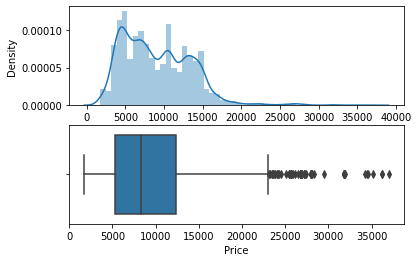

<Figure size 1080x576 with 0 Axes>

In [76]:
plt.figure(figsize=(30,20))
plot(data,'Price')

### separate your independent & dependent data

In [77]:
X=data.drop('Price',axis=1)
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [79]:
y=data['Price']
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

### Feature Selection
    Finding out the best feature which will contribute and have good relation with target variable. 
    
### Why to apply Feature Selection?
    To select important features to get rid of curse of dimensionality ie..to get rid of duplicate features

### I wanted to find mutual information scores or matrix to get to know about the relationship between all features.

In [80]:
from sklearn.feature_selection import mutual_info_classif

In [82]:
mutual_info_classif(X,y)

array([2.12228590e+00, 2.05415213e+00, 2.80076544e+00, 2.28926271e+00,
       1.46865379e+00, 7.82317069e-01, 7.45540526e-01, 1.04872091e-01,
       6.75623638e-01, 9.31738579e-01, 3.14218767e-03, 5.71503988e-01,
       4.82803110e-03, 3.24937162e-01, 3.30493878e-04, 2.26366313e-01,
       1.40544700e-02, 1.62949866e-01, 1.54688654e+00, 8.73033270e-01,
       3.06770459e-01, 1.54350726e+00, 3.94099569e-01, 2.73617525e-01,
       1.67499099e-01, 3.73513659e-01, 1.11025631e+00, 8.48158712e-01,
       1.43792985e+00, 1.21654790e+00, 1.86665782e+00, 1.51408389e+00,
       1.77009858e+00, 1.05172764e+00])

In [83]:
imp=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,2.167994
Route_1,2.079212
Route_2,2.723323
Route_3,2.303002
Route_4,1.466371
Route_5,0.772151
Air India,0.738058
GoAir,0.102169
IndiGo,0.657553
Jet Airways,0.913837


In [84]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route_2,2.723323
Route_3,2.303002
Total_Stops,2.167994
Route_1,2.079212
Arrival_Time_hour,1.849705
Duration_hours,1.784387
Delhi,1.555212
Arrival_Time_minute,1.536790
Cochin,1.514417
Route_4,1.466371


#### split dataset into train & test

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [88]:
from sklearn import metrics
##dump your model using pickle so that we will re-use
# import pickle
def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)
    
#     if dump==1:
#         ##dump your model using pickle so that we will re-use
#         file=open('E:\End-2-end Projects\Flight_Price/model.pkl','wb')
#         pickle.dump(model,file

#### import randomforest class

In [89]:
from sklearn.ensemble import RandomForestRegressor

Training score : 0.955308615133194
predictions are: 
 [7033.7        6590.14       5645.41666667 ... 4514.36       3848.65916667
 8744.84916667]


r2 score: 0.8133318096679932
MAE: 1180.6966195079813
MSE: 3588839.4034694238
RMSE: 1894.4232376819664


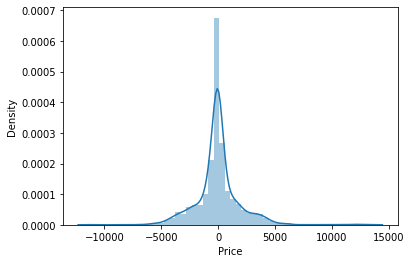

In [91]:
predict(RandomForestRegressor())

***play with multiple Algorithms***

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

*** DECISION TREE ***

Training score : 0.9688179658322958
predictions are: 
 [7452. 6218. 4823. ... 4667. 3841. 9564.]


r2 score: 0.7211089937780316
MAE: 1370.9098970519422
MSE: 5361893.907164638
RMSE: 2315.576366083537


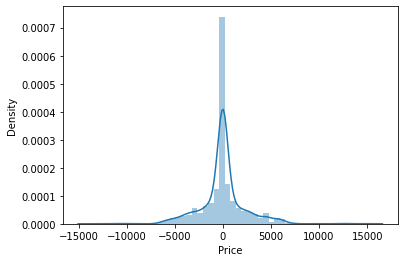

In [94]:
predict(DecisionTreeRegressor())

## LINEAR REGRESSION

Training score : 0.6103794862103007
predictions are: 
 [6887.  9123.  7439.5 ... 5205.5 3724.  7262.5]


r2 score: 0.6264154074249484
MAE: 1919.831305568554
MSE: 7182450.871665887
RMSE: 2680.009490965636


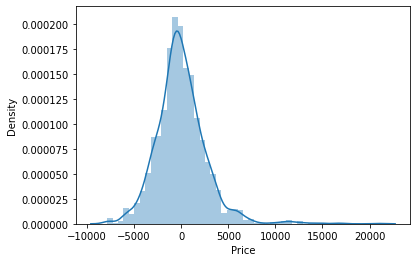

In [95]:
predict(LinearRegression())

### kNEIGHBORS REGRESSION

Training score : 0.7772099853304358
predictions are: 
 [ 6412.  16648.   8204.6 ...  4415.2  3914.   7557.6]


r2 score: 0.6704775818182243
MAE: 1698.9467477772578
MSE: 6335321.7095741695
RMSE: 2517.006497721881


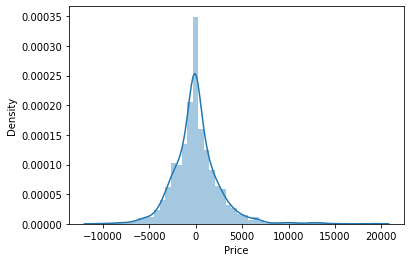

In [96]:
predict(KNeighborsRegressor())

#### Hyperparameter Tuning
    1.Choose following method for hyperparameter tuning
        a.RandomizedSearchCV --> Fast way to Hypertune model
        b.GridSearchCV--> Slow way to hypertune my model
    
    2.Assign hyperparameters in form of dictionary
    3.Fit the model
    4.Check best paramters and best score

In [99]:
from sklearn.model_selection import RandomizedSearchCV

In [100]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]

# Number of features to consider at every split
max_features=['auto','sqrt']

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [101]:
# Create the random grid

random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [102]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [123]:
# Random search of parameters, using 3 fold cross validation

rf_random=RandomizedSearchCV(estimator='scoring',param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [126]:
# rf_random.fit(X_train,y_train)
# rf_random.best_params_

In [127]:
# sns.distplot(y_test-prediction)